## Trabajo semanal 4
# **Primeras nociones de estimación espectral**
**Federico Dunel**

## **Introducción**

## **Analisis de datos**

1) Generacion de las variables y funciones utilizadas.

In [1]:

from numpy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.signal.windows as win

def funsen(ff, nn, fs, snr, amp = 1, dc = 0, ph = 0):
    n=np.arange(nn)
    t=n/fs
    x= dc + amp*np.sin(2*np.pi*ff*t+ph) + snr
    return t,x

def ruido (tipo, v_min = 0, v_max = 0, vmed = 0, variacion = 1, muestras = 100):
    if tipo == 1:
        noise = np.random.normal(vmed, variacion, muestras)
    elif tipo == 2:
        noise = np.random.uniform(v_min, v_max, muestras)
    elif tipo == 3:
        noise = np.random.randn(muestras)
    
    return noise

def eje_temporal (N, fs):
    
    Ts = 1/fs
    t_final = N * Ts
    tt = np.arange (0, t_final, Ts)
    return tt

def esperanza (muestras):
    mu = (1/len(muestras))*np.sum(muestras)
    return mu

def varianza (muestras, mu):
    aux1 = (1/len(muestras))
    var = aux1 * np.sum((muestras - mu)**2)
    return var


N=1000
Fs=N
df=Fs/N
ts=1/Fs
frec=np.arange(N)*df
tt1 = eje_temporal (N = N, fs = Fs)
amp0 = np.sqrt(2)
#realizaciones de la frecuencia
R = 200
frecuencia_random = np.random.uniform(-2, 2, R)   #vector de parametros
ff = N/4 + frecuencia_random
PP = amp0
tt = tt1.reshape(-1,1)
frec=np.arange(N)*df


2) Creación de las funciones y las transformaciones con las ventanas. Para los fft se utilizo un zeropadding de 10*N

In [2]:
noise = ruido(tipo = 1, vmed = 0, variacion = 1, muestras = 1000)

matriz_t = np.tile(tt, (1,R)) #reshape vuelve un vector horizontal en vertical
matriz_ff = np.tile(ff, (N,1)) #tile repite un valor las veces que le indiques en otras filas o columnas
matriz_ruido = np.tile(noise.reshape(-1,1), (1,R))

matriz_sen = amp0 * np.sin(2*np.pi*matriz_ff *(Fs/N)* matriz_t) + matriz_ruido 

#ventaneo

flattop = win.flattop(N).reshape(-1,1)
matriz_fft_flat = fft(matriz_sen*flattop, n = 10*N, axis = 0)
abs_matriz_fft_flat = (1/N) * np.abs(matriz_fft_flat)


blackman = win.blackman(N).reshape(-1,1)
matriz_fft_black = fft(matriz_sen*blackman, n = 10*N, axis = 0)
abs_matriz_fft_blackman = (1/N) * np.abs(matriz_fft_black)

rectangular = win.boxcar(N).reshape(-1,1)
matriz_fft_rect = fft(matriz_sen*rectangular, n = 10*N, axis = 0)
abs_matriz_fft_rect = (1/N) * np.abs(matriz_fft_rect)

hamming = win.hamming(N).reshape(-1,1)
matriz_fft_ham = fft(matriz_sen*hamming, n = 10*N, axis = 0)
abs_matriz_fft_ham = (1/N) * np.abs(matriz_fft_ham)


3) Grafico los FFT en decibelios de las funciones ventaneadas, limito el eje x para que se noten mejor los maximos

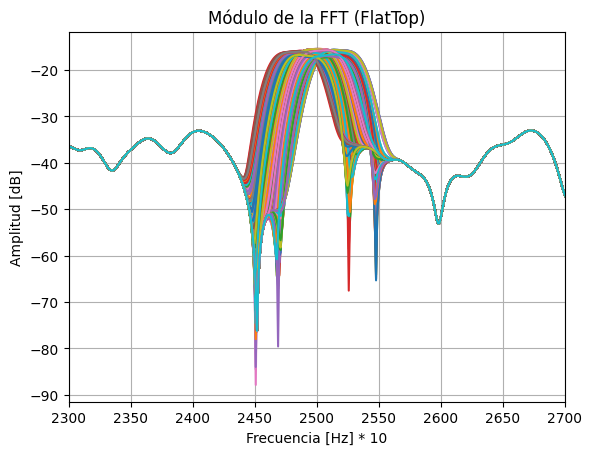

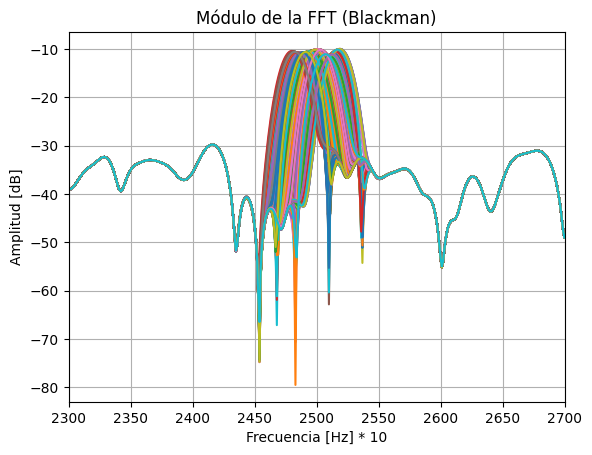

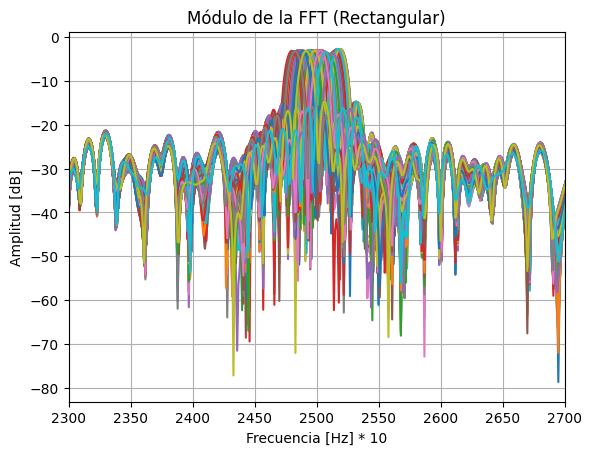

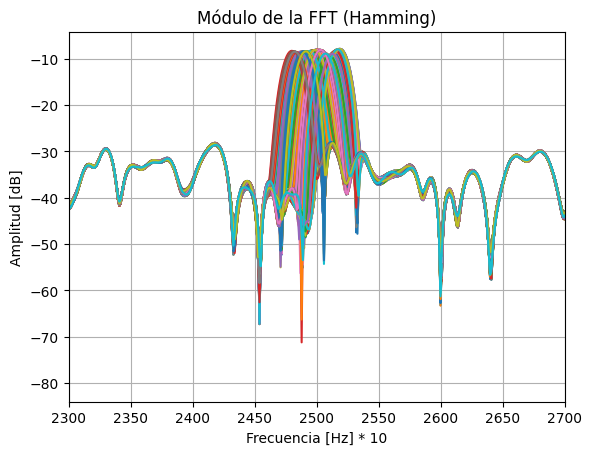

In [7]:

# Figura 1: FlatTop
plt.figure(1)
plt.plot(10*np.log10(abs_matriz_fft_flat**2))
plt.xlim([0, (N/2)*10])
plt.title("Módulo de la FFT (FlatTop)")
plt.xlabel("Frecuencia [Hz] * 10")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.xlim([((N/4)*10)-200,((N/4)*10)+200])
plt.show()


# Figura 2: Blackman
plt.figure(2)
plt.plot(10*np.log10(abs_matriz_fft_blackman**2))
plt.xlim([0, (N/2)*10])
plt.title("Módulo de la FFT (Blackman)")
plt.xlabel("Frecuencia [Hz] * 10")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.xlim([((N/4)*10)-200,((N/4)*10)+200])
plt.show()

# Figura 3: Rectangular
plt.figure(3)
plt.plot(10*np.log10(abs_matriz_fft_rect**2))
plt.xlim([0, (N/2)*10])
plt.title("Módulo de la FFT (Rectangular)")
plt.xlabel("Frecuencia [Hz] * 10")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.xlim([((N/4)*10)-200,((N/4)*10)+200])
plt.show()


# Figura 4: Hamming
plt.figure(4)
plt.plot(10*np.log10(abs_matriz_fft_ham**2))
plt.xlim([0, (N/2)*10])
plt.title("Módulo de la FFT (Hamming)")
plt.xlabel("Frecuencia [Hz] * 10")
plt.ylabel("Amplitud [dB]")
plt.grid(True)
plt.xlim([((N/4)*10)-200,((N/4)*10)+200])
plt.show()


4) sesgo y varianza de amplitud

In [11]:

muFlat = esperanza(10*np.log10(2*abs_matriz_fft_flat[(N//4)*10,:]**2))
sesgoFlat = muFlat - 0
varflat = varianza (10*np.log10(2*abs_matriz_fft_flat[(N//4)*10,:]**2),muFlat)  


mublack = esperanza(10*np.log10(2*abs_matriz_fft_blackman[(N//4)*10,:]**2))
sesgoBlack = mublack - 0 
varblack = varianza (10*np.log10(2*abs_matriz_fft_blackman[(N//4)*10,:]**2),mublack) 


murect = esperanza(10*np.log10(2*abs_matriz_fft_rect[(N//4)*10,:]**2))
sesgorect = murect - 0 
varrect = varianza (10*np.log10(2*abs_matriz_fft_rect[(N//4)*10,:]**2),murect) 


muham = esperanza(10*np.log10(2*abs_matriz_fft_ham[(N//4)*10,:]**2))
sesgoham = muham - 0 
varham = varianza (10*np.log10(2*abs_matriz_fft_ham[(N//4)*10,:]**2),muham) 

print("sesgo y varianza de amplitud")
print("FlatTop:", sesgoFlat,varflat) 
print("Blackman:", sesgoBlack,varblack)
print("Rectangular:", sesgorect,varrect)
print("Hamming:", sesgoham,varham)


sesgo y varianza de amplitud
FlatTop: -14.243929408477147 0.7480490338059039
Blackman: -14.03948304081085 24.757767060366515
Rectangular: -14.192727153945002 91.48915118725084
Hamming: -16.456780314527197 77.92888629407796


5) sesgo y varianza de frecuencia (tengo q encontrarle la vuelta todavia)

In [12]:

#Flattop

frecflat = np.argmax(10*np.log10(abs_matriz_fft_flat**2), axis=0)
esperanza_frecuencia = esperanza (frecflat)
sesgo_frec_flat = esperanza(frecflat) - ((N/4) * 10)
var_frec_flat = varianza(frecflat ,esperanza(frecflat))

#Blackman

frecblack = np.argmax(10*np.log10(abs_matriz_fft_blackman**2), axis=0)
sesgo_frec_black = esperanza(frecblack) - ((N/4) * 10)
var_frec_black = varianza(frecblack ,esperanza(frecblack))

#Rectangular

frecrect = np.argmax(10*np.log10(abs_matriz_fft_rect**2), axis=0)
sesgo_frec_rect = esperanza(frecrect) - ((N/4) * 10)
var_frec_rect = varianza(frecrect ,esperanza(frecrect))

#Hamming

frecham = np.argmax(10*np.log10(abs_matriz_fft_ham**2), axis=0)
sesgo_frec_ham = esperanza(frecham) - ((N/4) * 10)
var_frec_ham = varianza(frecham ,esperanza(frecham))

print("sesgo y varianza de frecuencia")
print("FlatTop:", sesgo_frec_flat, var_frec_flat)
print("Blackman:", sesgo_frec_black, var_frec_black)
print("Rectangular:", sesgo_frec_rect, var_frec_rect)
print("Hamming:", sesgo_frec_ham, var_frec_ham)


sesgo y varianza de frecuencia
FlatTop: 499.0450000000001 2252215.8329749997
Blackman: 400.75 1842989.6175
Rectangular: 1126.7600000000002 4363602.3024
Hamming: 850.1800000000003 3527734.3476


Se puede apreciar como analizando el sesgo y la variaza de la amplitud, la funcion ventaneada con FlatTop es la que más se acerca al valor esperado, con una varianza de o.75.